In [21]:
import numpy as np
import matplotlib.pyplot as plt

home = '/home/chesteklab/predictions/20241001-1629/'
#DLC Actor
overall = np.load(home + 'latencies.npy')
dlc = np.load(home + 'dlcLatencies.npy')
grab = np.load(home + 'grabLatencies.npy')
put = np.load(home + 'putLatencies.npy')

#GUI Actor

gui_pred = np.load(home + 'vizpredictionslatencies.npy')
gui_frame = np.load(home + 'vizframelatencies.npy')

#Video Actor
save = np.load(home + 'saveLatencies.npy')

#Camera Actor
cam = np.load(home + 'camframeLatencies.npy')

fps = 30
time = np.arange(0, len(overall)) / fps

In [37]:
test = np.load("/home/chesteklab/predictions/20241001-1803/vizframelatencies.npy")

In [38]:
test

array([], dtype=float64)

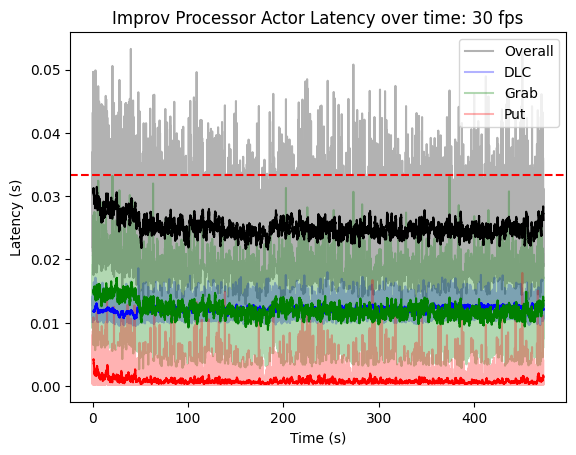

In [32]:
window_size = 30
time = np.arange(0, len(overall)) / fps
# Calculate running mean
overall_mean = np.convolve(overall, np.ones(window_size)/window_size, mode='valid')
dlc_mean = np.convolve(dlc, np.ones(window_size)/window_size, mode='valid')
grab_mean = np.convolve(grab, np.ones(window_size)/window_size, mode='valid')
put_mean = np.convolve(put, np.ones(window_size)/window_size, mode='valid')

# Plot raw data with transparency
plt.plot(time, overall, label='Overall', alpha=0.3, color='black')
plt.plot(time, dlc, label='DLC', alpha=0.3, color='blue')
plt.plot(time, grab, label='Grab', alpha=0.3, color='green')
plt.plot(time, put, label='Put', alpha=0.3, color='red')

# Plot running mean
plt.plot(time[window_size-1:], overall_mean, color='black')
plt.plot(time[window_size-1:], dlc_mean, color='blue')
plt.plot(time[window_size-1:], grab_mean, color='green')
plt.plot(time[window_size-1:], put_mean,  color='red')

plt.legend()
plt.ylabel('Latency (s)')
plt.xlabel('Time (s)')
plt.title(f'Improv Processor Actor Latency over time: {fps} fps')
plt.axhline(y=1/fps, color='r', linestyle='--')
plt.show()

Text(0.5, 1.0, 'Delay over time: 30 fps, Avg Accumulated Delay: 0.25s')

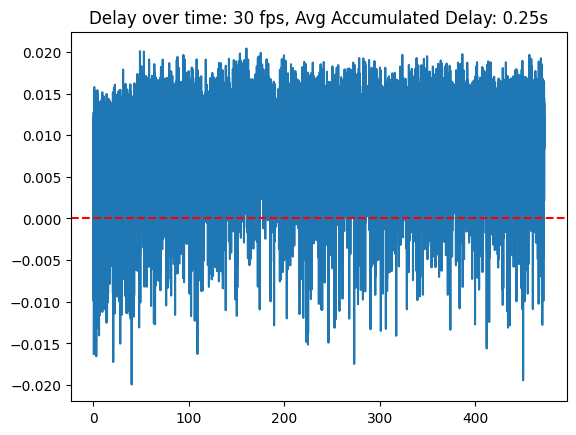

In [22]:
delay = (1/30-overall)
accumulated_delay = np.cumsum(delay)
plt.plot(time, delay, label='Delay')
plt.axhline(y=0, color='r', linestyle='--')
plt.title(f'Delay over time: {fps} fps, Avg Accumulated Delay: {accumulated_delay[-1]/time[-1]:.2f}s')

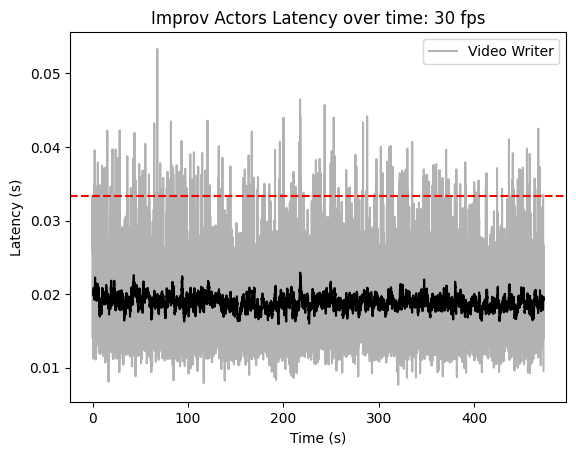

In [36]:
window_size = 30
time = np.arange(0, len(cam)) / fps
# Calculate running mean
# cam_mean = np.convolve(cam, np.ones(window_size)/window_size, mode='valid')
# gui_pred_mean = np.convolve(gui_pred, np.ones(window_size)/window_size, mode='valid')
# gui_frame_mean = np.convolve(gui_frame, np.ones(window_size)/window_size, mode='valid')
save_mean = np.convolve(save, np.ones(window_size)/window_size, mode='valid')

# Plot raw data with transparency
# plt.plot(time, cam, label='Camera Grabber', alpha=0.3, color='black')
# plt.plot(time, gui_pred, label='GUI Prediction', alpha=0.3, color='blue')
# plt.plot(time, gui_frame, label='GUI Frame', alpha=0.3, color='green')
time = np.arange(0, len(save)) / fps
plt.plot(time, save, label='Video Writer', alpha=0.3, color='black')
# time = np.arange(0, len(overall)) / fps
# plt.plot(time, overall, label='DLC', alpha=0.3, color='purple')

# Plot running mean
plt.plot(time[window_size-1:], save_mean, color='black')


plt.legend()
plt.ylabel('Latency (s)')
plt.xlabel('Time (s)')
plt.title(f'Improv Actors Latency over time: {fps} fps')
plt.axhline(y=1/fps, color='r', linestyle='--')
plt.show()